In [1]:
# Import Dependancies
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np

In [2]:
# Create file path
path = 'Cleaned_Crimes_-_2016_to_present.csv'

# Read csv file with pandas
df = pd.read_csv(path, encoding='ISO-8859-1')

In [3]:
df.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,0,25953,JE240540,05/24/2021 03:06:00 PM,020XX N LARAMIE AVE,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,True,...,36.0,19.0,01A,1141387.0,1913179.0,2021,11/18/2023 03:39:49 PM,41.917838,-87.755969,"(41.917838056, -87.755968972)"
1,1,26038,JE279849,06/26/2021 09:24:00 AM,062XX N MC CORMICK RD,0110,HOMICIDE,FIRST DEGREE MURDER,PARKING LOT,True,...,50.0,13.0,01A,1152781.0,1941458.0,2021,11/18/2023 03:39:49 PM,41.995219,-87.713355,"(41.995219444, -87.713354912)"
2,2,13279676,JG507211,11/09/2023 07:30:00 AM,019XX W BYRON ST,0620,BURGLARY,UNLAWFUL ENTRY,APARTMENT,False,...,47.0,5.0,05,1162518.0,1925906.0,2023,11/18/2023 03:39:49 PM,41.952345,-87.677975,"(41.952345086, -87.677975059)"
3,3,13274752,JG501049,11/12/2023 07:59:00 AM,086XX S COTTAGE GROVE AVE,0454,BATTERY,"AGGRAVATED P.O. - HANDS, FISTS, FEET, NO / MIN...",SMALL RETAIL STORE,True,...,6.0,44.0,08B,1183071.0,1847869.0,2023,12/09/2023 03:41:24 PM,41.737751,-87.604856,"(41.737750767, -87.604855911)"
4,4,13203321,JG415333,09/06/2023 05:00:00 PM,002XX N Wells st,1320,CRIMINAL DAMAGE,TO VEHICLE,PARKING LOT / GARAGE (NON RESIDENTIAL),False,...,42.0,32.0,14,1174694.0,1901831.0,2023,11/04/2023 03:40:18 PM,41.886018,-87.633938,"(41.886018055, -87.633937881)"


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2171288 entries, 0 to 2171287
Data columns (total 23 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Unnamed: 0            int64  
 1   ID                    int64  
 2   Case Number           object 
 3   Date                  object 
 4   Block                 object 
 5   IUCR                  object 
 6   Primary Type          object 
 7   Description           object 
 8   Location Description  object 
 9   Arrest                bool   
 10  Domestic              bool   
 11  Beat                  int64  
 12  District              float64
 13  Ward                  float64
 14  Community Area        float64
 15  FBI Code              object 
 16  X Coordinate          float64
 17  Y Coordinate          float64
 18  Year                  int64  
 19  Updated On            object 
 20  Latitude              float64
 21  Longitude             float64
 22  Location              object 
dtypes: bool

In [5]:
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y %I:%M:%S %p')

In [6]:
# Next, define pandemic periods
df['Pandemic Period'] = pd.cut(
    df['Date'],
    bins=[
        pd.Timestamp('2017-01-01'),
        pd.Timestamp('2020-01-31'),
        pd.Timestamp('2023-05-11'),
        pd.Timestamp('2024-10-25'),
    ],
    labels=['Before Pandemic', 'During Pandemic', 'After Pandemic'],
    right = False # This makes the right edge of each bin exclusive 
)
# Basic stats and summary by period
print(df.info())
print(df.groupby('Pandemic Period').size())

# Filter data for relevant columns
crime_location_data = df[['Date', 'Primary Type', 'Block', 'Latitude', 'Longitude', 'Pandemic Period']].dropna()

crime_location_data = crime_location_data[
    (crime_location_data['Latitude'] != 0.0) & # Removes any undifined/missing latitude values
    (crime_location_data['Longitude'] != 0.0) & # Removes any undifined/missing longitude values
    (crime_location_data['Latitude'] > 37.0) # Removes unfortunate outlier
]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2171288 entries, 0 to 2171287
Data columns (total 24 columns):
 #   Column                Dtype         
---  ------                -----         
 0   Unnamed: 0            int64         
 1   ID                    int64         
 2   Case Number           object        
 3   Date                  datetime64[ns]
 4   Block                 object        
 5   IUCR                  object        
 6   Primary Type          object        
 7   Description           object        
 8   Location Description  object        
 9   Arrest                bool          
 10  Domestic              bool          
 11  Beat                  int64         
 12  District              float64       
 13  Ward                  float64       
 14  Community Area        float64       
 15  FBI Code              object        
 16  X Coordinate          float64       
 17  Y Coordinate          float64       
 18  Year                  int64         
 19  

C:\Users\mwill\AppData\Local\Temp\ipykernel_46816\523175352.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby('Pandemic Period').size())


In [7]:
# Create column for season
df['Season'] = np.where(df['Date'].dt.month == 1, 'Winter',
                      np.where(df['Date'].dt.month == 2, 'Winter',
                      np.where(df['Date'].dt.month == 3, 'Spring',
                      np.where(df['Date'].dt.month == 4, 'Spring',
                      np.where(df['Date'].dt.month == 5, 'Spring',
                      np.where(df['Date'].dt.month == 6, 'Summer',
                      np.where(df['Date'].dt.month == 7, 'Summer',
                      np.where(df['Date'].dt.month == 8, 'Summer',
                      np.where(df['Date'].dt.month == 9, 'Fall',
                      np.where(df['Date'].dt.month == 10, 'Fall',
                      np.where(df['Date'].dt.month == 11, 'Fall',
                      np.where(df['Date'].dt.month == 12, 'Winter', 'Unknown'))))))))))))

<Axes: xlabel='Season'>

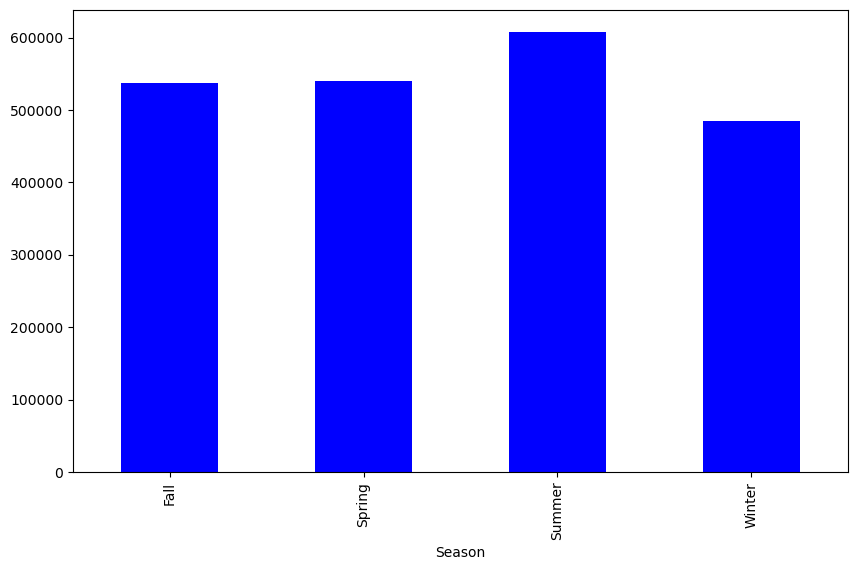

In [8]:
# Bar chart for crime incidents by season
season_count = df.groupby( 'Season').size()
season_count.plot(kind='bar', figsize=(10,6), color='blue')

<Axes: xlabel='Year'>

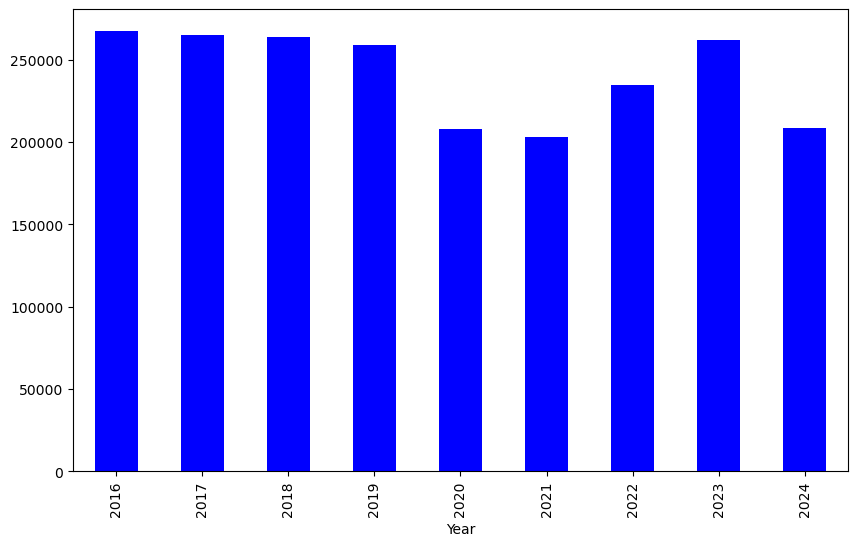

In [9]:
# Bar chart for crime incidents by year
total_count = df.groupby('Year').size()
total_count.plot(kind='bar', figsize=(10,6), color='blue')

Text(0, 0.5, 'Arrests')

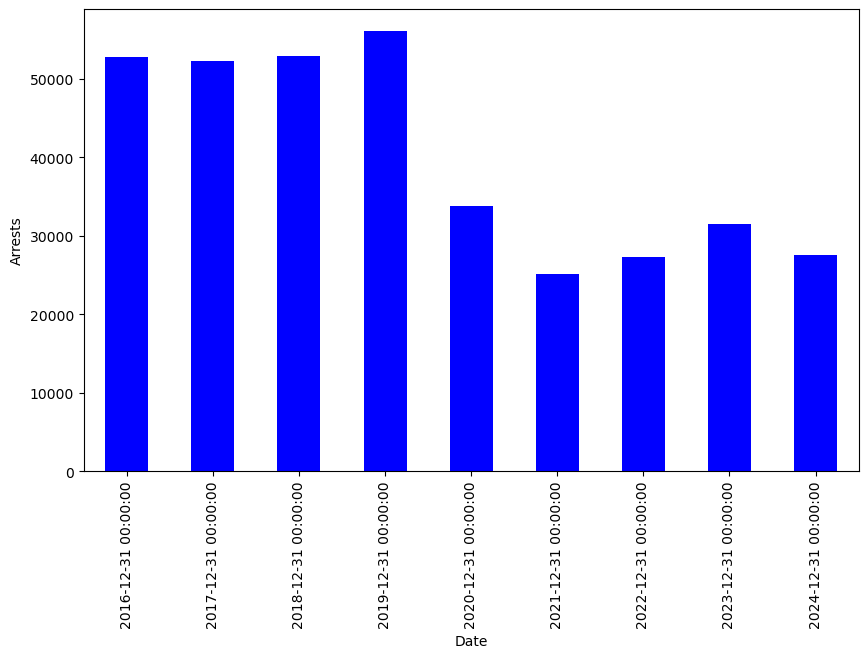

In [10]:
# Dataframe for incidents leading to arrests and bar chart for arrests per year
all_arrests = df[df['Arrest'] == 1]
all_arrests.head()
all_arrests.set_index('Date', inplace=True)
arrests = all_arrests.resample('YE').size()
arrests.plot(kind='bar', figsize=(10,6), color='blue')
plt.ylabel('Arrests')

In [11]:
# Create a new dataframe and a column for a percentage of incidents leading to arrest per year
percentage_true = df.groupby('Year')['Arrest'].agg(
    total_count='count',
    true_count='sum'
).reset_index()
percentage_true['percentage_true'] = (percentage_true['true_count'] / percentage_true['total_count']) * 100
percentage_true

,Year,total_count,true_count,percentage_true
0,2016,267270,52857,19.776630
1,2017,264964,52280,19.730982
2,2018,263552,52943,20.088256
3,2019,259158,56105,21.648955
4,2020,207947,33805,16.256546
5,2021,202857,25084,12.365361
6,2022,234879,27239,11.597035
7,2023,261932,31537,12.040148
8,2024,208729,27567,13.207077


In [12]:
# Create a new dataframe and a column for a percentage of incidents leading to arrest per pandemic period
period_percentage_true = df.groupby('Pandemic Period')['Arrest'].agg(
    total_count='count',
    true_count='sum'
).reset_index()
period_percentage_true['percentage_true'] = (period_percentage_true['true_count'] / period_percentage_true['total_count']) * 100
period_percentage_true

C:\Users\mwill\AppData\Local\Temp\ipykernel_46816\956274627.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  period_percentage_true = df.groupby('Pandemic Period')['Arrest'].agg(


,Pandemic Period,total_count,true_count,percentage_true
0,Before Pandemic,806624,165693,20.541541
1,During Pandemic,714420,92672,12.971641
2,After Pandemic,382974,48195,12.584405


Text(0, 0.5, 'Percentage of Incidents Leading to Arrest')

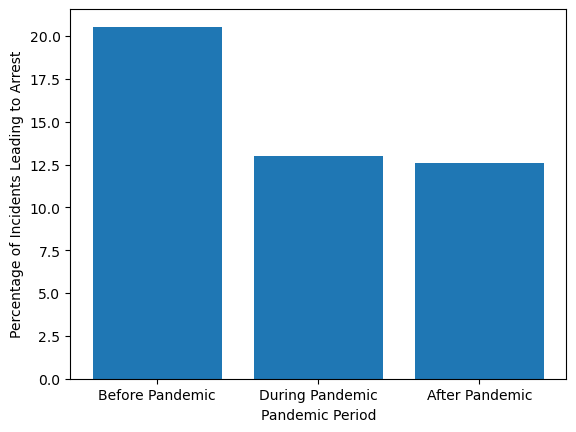

In [13]:
# Bar chart for percentage of incidents leading to arrest per pandemic period
plt.bar(period_percentage_true['Pandemic Period'], period_percentage_true['percentage_true'], label='Total')
plt.xlabel('Pandemic Period')
plt.ylabel('Percentage of Incidents Leading to Arrest')

Text(0, 0.5, 'Percentage of Incidents Leading to Arrest')

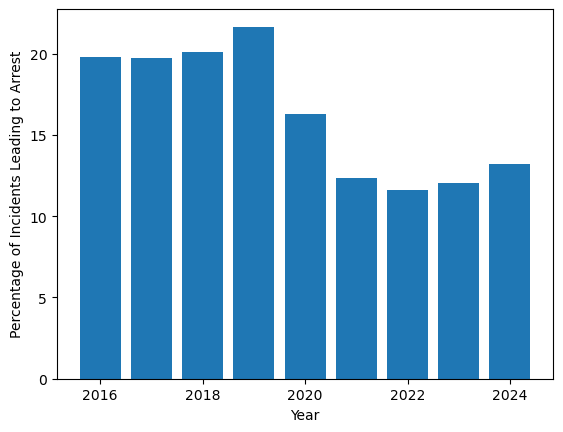

In [14]:
# Bar chart for percentage of incidents leading to arrest per year
plt.bar(percentage_true['Year'], percentage_true['percentage_true'], label='Total')
plt.xlabel('Year')
plt.ylabel('Percentage of Incidents Leading to Arrest')

Text(0, 0.5, 'Percentage of Incidents Leading to Arrest')

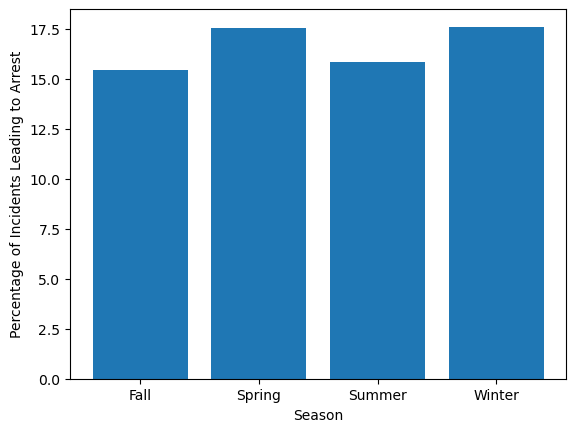

In [15]:
# Dataframe for arrests per season and bar chart for percentage of incidents leading to arrest per season
season_percentage_true = df.groupby('Season')['Arrest'].agg(
    total_count='count',
    true_count='sum'
).reset_index()
season_percentage_true['percentage_true'] = (season_percentage_true['true_count'] / season_percentage_true['total_count']) * 100
plt.bar(season_percentage_true['Season'], season_percentage_true['percentage_true'], label='Total')
plt.xlabel('Season')
plt.ylabel('Percentage of Incidents Leading to Arrest')